### Import libraries


In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Customize notebook with jupyterthemes
from jupyterthemes import jtplot as jt
jt.style(theme = 'grade3', context = 'notebook', ticks = True, grid = False)
# Postgres DB connector
import psycopg2
# Password for Postgres DB
from config import postpw

### Read Data


In [2]:
print(postpw)

IX@55pkt


In [3]:
# Connection String for the Postgress database - Replace yourPW with the password you used when you installed Postgres
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format('127.0.0.1', 5432, 'Group6Final', 'postgres', postpw))

In [4]:
SQL = """SELECT "Age",
"Attrition",
"BUSINESSTRAVEL",
"DailyRate",
"Department",
"DistanceFromHome",
"Education",
"EDUCATIONFIELD",
"EmployeeCount",
"EmployeeNumber",
"EnvironmentSatisfaction",
"GENDER",
"HourlyRate",
"JobInvolvement",
"JobLevel",
"JOBROLE",
"JobSatisfaction",
"MARITALSTATUS",
"MonthlyIncome",
"MonthlyRate",
"NumCompaniesWorked",
"Over18",
"OverTime",
"PercentSalaryHike",
"PerformanceRating",
"RelationshipSatisfaction",
"StandardHours",
"StockOptionLevel",
"TotalWorkingYears",
"TrainingTimesLastYear",
"WorkLifeBalance",
"YearsAtCompany",
"YearsInCurrentRole",
"YearsSinceLastPromotion",
"YearsWithCurrManager",
"NumberProjects",
"WorkplaceAccident"
FROM "Employee_Status" AS ES
JOIN "CD_TRAVEL" CDT ON ES."BusinessTravel_FK" = CDT."BUSINESSTRAVEL_FK"
JOIN "CD_DEPARTMENT" CDD ON ES."Department_FK" = CDD."DEPARTMENT_FK"
JOIN "CD_EDUCATIONFIELD" CDE ON ES."EducationField_FK" = CDE."EDUCATIONFIELD_FK"
JOIN "CD_GENDER" CDG ON ES."Gender_FK" = CDG."GENDER_FK"
JOIN "CD_ROLE" CDR ON ES."JobRole_FK" = CDR."JOBROLE_FK"
JOIN "CD_M_STATUS" CDS ON ES."MaritalStatus_FK" = CDS."MARITALSTATUS_FK""" + '"'

In [5]:
# Need to add the double quotes back in at the end
SQL 

'SELECT "Age",\n"Attrition",\n"BUSINESSTRAVEL",\n"DailyRate",\n"Department",\n"DistanceFromHome",\n"Education",\n"EDUCATIONFIELD",\n"EmployeeCount",\n"EmployeeNumber",\n"EnvironmentSatisfaction",\n"GENDER",\n"HourlyRate",\n"JobInvolvement",\n"JobLevel",\n"JOBROLE",\n"JobSatisfaction",\n"MARITALSTATUS",\n"MonthlyIncome",\n"MonthlyRate",\n"NumCompaniesWorked",\n"Over18",\n"OverTime",\n"PercentSalaryHike",\n"PerformanceRating",\n"RelationshipSatisfaction",\n"StandardHours",\n"StockOptionLevel",\n"TotalWorkingYears",\n"TrainingTimesLastYear",\n"WorkLifeBalance",\n"YearsAtCompany",\n"YearsInCurrentRole",\n"YearsSinceLastPromotion",\n"YearsWithCurrManager",\n"NumberProjects",\n"WorkplaceAccident"\nFROM "Employee_Status" AS ES\nJOIN "CD_TRAVEL" CDT ON ES."BusinessTravel_FK" = CDT."BUSINESSTRAVEL_FK"\nJOIN "CD_DEPARTMENT" CDD ON ES."Department_FK" = CDD."DEPARTMENT_FK"\nJOIN "CD_EDUCATIONFIELD" CDE ON ES."EducationField_FK" = CDE."EDUCATIONFIELD_FK"\nJOIN "CD_GENDER" CDG ON ES."Gender_FK" = CD

In [6]:
# Read the file into a dataframe
hr_df = pd.read_sql_query(SQL, conn)
hr_df_copy = hr_df 

### Initial Analysis
- Any missing elements that need to be fixed
- Fix data issues


In [7]:
# Check the data and column names
hr_df.head()

Age Attrition     BUSINESSTRAVEL  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EDUCATIONFIELD  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0  ...                 0                 8                      0   
1  ...                 1                10                      3   
2  ...                 0                 7                      3   
3  ...                 0                 8                      3   
4  ...                 1                 6                      3   

   WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                1               6                  4   
1                3              10                  7   
2                3               0                  0   
3                3               8                  7   
4                3               2                  2   

   YearsSinceLastPromotion YearsWithCurrManager  NumberProjects  \
0                        0                    5               2   
1                        1                    7               5   
2                        0                    0               7   
3                        3                    0               5   
4                        2                    2               2   

   WorkplaceAccident  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 37 columns]

In [8]:
# Rename column names so they are all consistent
hr_df.rename(columns = {'BUSINESSTRAVEL':'BusinessTravel','EDUCATIONFIELD':'EducationField','GENDER':'Gender','JOBROLE':'JobRole','MARITALSTATUS':'MaritalStatus' }, inplace = True)

In [9]:
# Verify the rename 
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'NumberProjects', 'WorkplaceAccident'],
      dtype='object')

In [10]:
# Check number of rows/columns
hr_df.shape

(1470, 37)

In [11]:
# Check for null values
hr_df.isnull().values.any()

False

In [12]:
# Another method to check for null values
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# Another check for null values
hr_df.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  StockOptionLevel  TotalWorkingYears  \
0              False  ...             False              False   
1              False  ...             False              False   
2              False  ...             False              False   
3              False  ...             False              False   
4              False  ...             False              False   
...              ...  ...               ...                ...   
1465           False  ...             False              False   
1466           False  ...             False              False   
1467           False  ...             False              False   
1468           False  ...             False              False   
1469           False  ...             False              False   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                     False            False           False   
1                     False            False           False   
2                     False            False           False   
3                     False            False           False   
4                     False            False           False   
...                     ...              ...             ...   
1465                  False            False           False   
1466                  False            False           False   
1467                  False            False           False   
1468                  False            False           False   
1469                  False            False           False   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                  False                    False                 False   
1                  False                    False                 False   
2                  False                    False                 False   
3                  False                    False                 False   
4                  False                    False                 False   
...                  ...                      ...                   ...   
1465               False                    False                 False   
1466               False                    False                 False   
1467               False                    False                 False   
1468               False                    False                 False   
1469               Fals

In [14]:
# Count of unique values in each column
hr_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Appears that columns EmployeeCount, Over18 and StandardHours all contain only 1 value
# Also, the EmployeeNumber is just an ID so it can be dropped

In [15]:
# Before we drop verify EmployeeCount values are the same for all employees
print(hr_df['EmployeeCount'].nunique())
print(hr_df['EmployeeCount'].unique())

1
[1]


In [16]:
# Before we drop verify Over18 values are the same for all employees
print(hr_df['Over18'].nunique())
print(hr_df['Over18'].nunique())

1
1


In [17]:
# Before we drop verify StandardHours values are the same for all employees
print(hr_df['StandardHours'].nunique())
print(hr_df['StandardHours'].unique())

1
[80]


In [18]:
hr_df = hr_df.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours'])

In [19]:
# Verify 4 columns dropped
hr_df.shape

(1470, 33)

### Exploratory Phase
- Get data statistics 
- Visualize the data

In [20]:
# determine data types by column
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [21]:
# Which columns are considered categorical, we need this info later for the encoding
hr_df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumberProjects',
       'WorkplaceAccident'],
      dtype='object')

In [22]:
# Which columns are considered categorical, we need this info later for the encoding
hr_df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [23]:
# How manu numerical features
len(hr_df.select_dtypes(include='int64').columns)

25

In [24]:
# get df stats
hr_df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  StockOptionLevel  \
count      1470.000000    1470.000000  ...       1470.000000   
mean          2.728571    6502.931293  ...          0.793878   
std           1.102846    4707.956783  ...          0.852077   
min           1.000000    1009.000000  ...          0.000000   
25%           2.000000    2911.000000  ...          0.000000   
50%           3.000000    4919.000000  ...          1.000000   
75%           4.000000    8379.000000  ...          1.000000   
max           4.000000   19999.000000  ...          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  NumberProjects  WorkplaceAccident  
count           1470.000000     1470.000000        1470.000000  
mean               4.123129        3.890476           0.051701  
std                3.568136        1.810522           0.221497  
min                0.000000        2.000000           0.000000  
25%                2.000000        2.000000           0.000000  
50%                3.000000        4.000000           0.000000  
75%                7.000000        6.000000           0.000000  
max               17.000000        7.000000           1.000000  

[8 rows x 25 columns]

In [25]:
# see all the columns with descriptive stats
pd.set_option('display.max_columns', None)
hr_df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1470.000000    1470.000000   1470.000000         1470.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102846    4707.956783   7117.786044            2.498009   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8047.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8379.000000  20461.500000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  NumberProjects  \
count              1470.000000           1470.000000     1470.000000   
mean                  2.187755              4.123129        3.890476   
std 

In [26]:
# random sample of the df
hr_df.sample(7)

Age Attrition BusinessTravel  DailyRate              Department  \
182    41       Yes  Travel_Rarely       1356                   Sales   
204    38       Yes  Travel_Rarely       1180  Research & Development   
1294   41        No  Travel_Rarely        447  Research & Development   
472    37        No  Travel_Rarely        446  Research & Development   
1358   31        No  Travel_Rarely       1079                   Sales   
454    29        No  Travel_Rarely        232  Research & Development   
1058   34       Yes  Travel_Rarely        790                   Sales   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
182                 20          2         Marketing                        2   
204                 29          1           Medical                        2   
1294                 5          3     Life Sciences                        2   
472                  1          4     Life Sciences                        2   
1358                10          2           Medical                        3   
454                 19          3  Technical Degree                        4   
1058                24          4           Medical                        1   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
182   Female          70               3         1       Sales Representative   
204     Male          70               3         2  Healthcare Representative   
1294    Male          85               4         2  Healthcare Representative   
472   Female          65               3         2     Manufacturing Director   
1358  Female          86               3         2            Sales Executive   
454     Male          34               3         2     Manufacturing Director   
1058  Female          40               2         2            Sales Executive   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
182                 2        Single           3140        21728   
204                 1       Married           6673        11354   
1294                2        Single           6870        15530   
472                 2       Married           6447        15701   
1358                4      Divorced           6583        20115   
454                 4      Divorced           4262        22645   
1058                2        Single           4599         7815   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
182                    1      Yes                 22                  4   
204                    7      Yes                 19                  3   
1294                   3       No                 12                  3   
472                    6       No                 12                  3   
1358                   2      Yes                 11                  3   
454                    4       No                 12                  3   
1058                   0      Yes                 23                  4   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
182                          4                 0                  4   
204                          2                 0                 17   
1294                         1                 0                 11   
472                          2                 1                  8   
1358                         4                 1                  8   
454                          2                 2                  8   
1058                         3                 0                 16   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
182                       5                2               4   
204                       2                3               1   
1294                      3                1               3   
472                       2                2               6   
1358                      2                3               5   
454                       2             

<AxesSubplot:xlabel='Education', ylabel='DailyRate'>

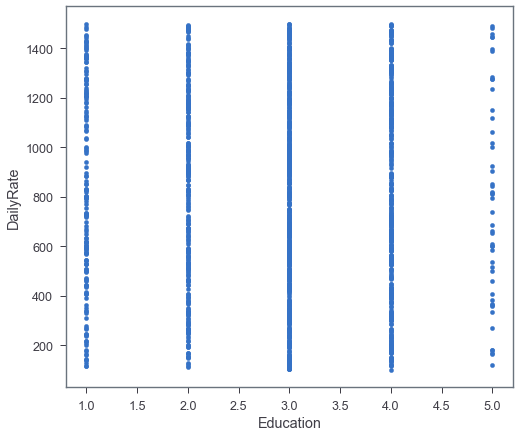

In [27]:
# look at running_time vs runtime using a scatter plot
hr_df.plot(x='Education', y='DailyRate', kind='scatter', color = 'b')

In [28]:
# Get a count of the target variable values
print("Count of Employees who stayed: ", (hr_df.Attrition == 'No').sum())
print("Count of Employees who left: ", (hr_df.Attrition == 'Yes').sum())

Count of Employees who stayed:  1233
Count of Employees who left:  237


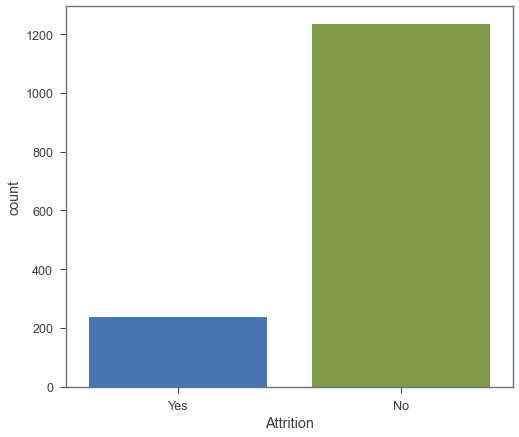

In [29]:
# Plot the target variable, how many instances of each value
sns.countplot(x=hr_df['Attrition'])
plt.show()

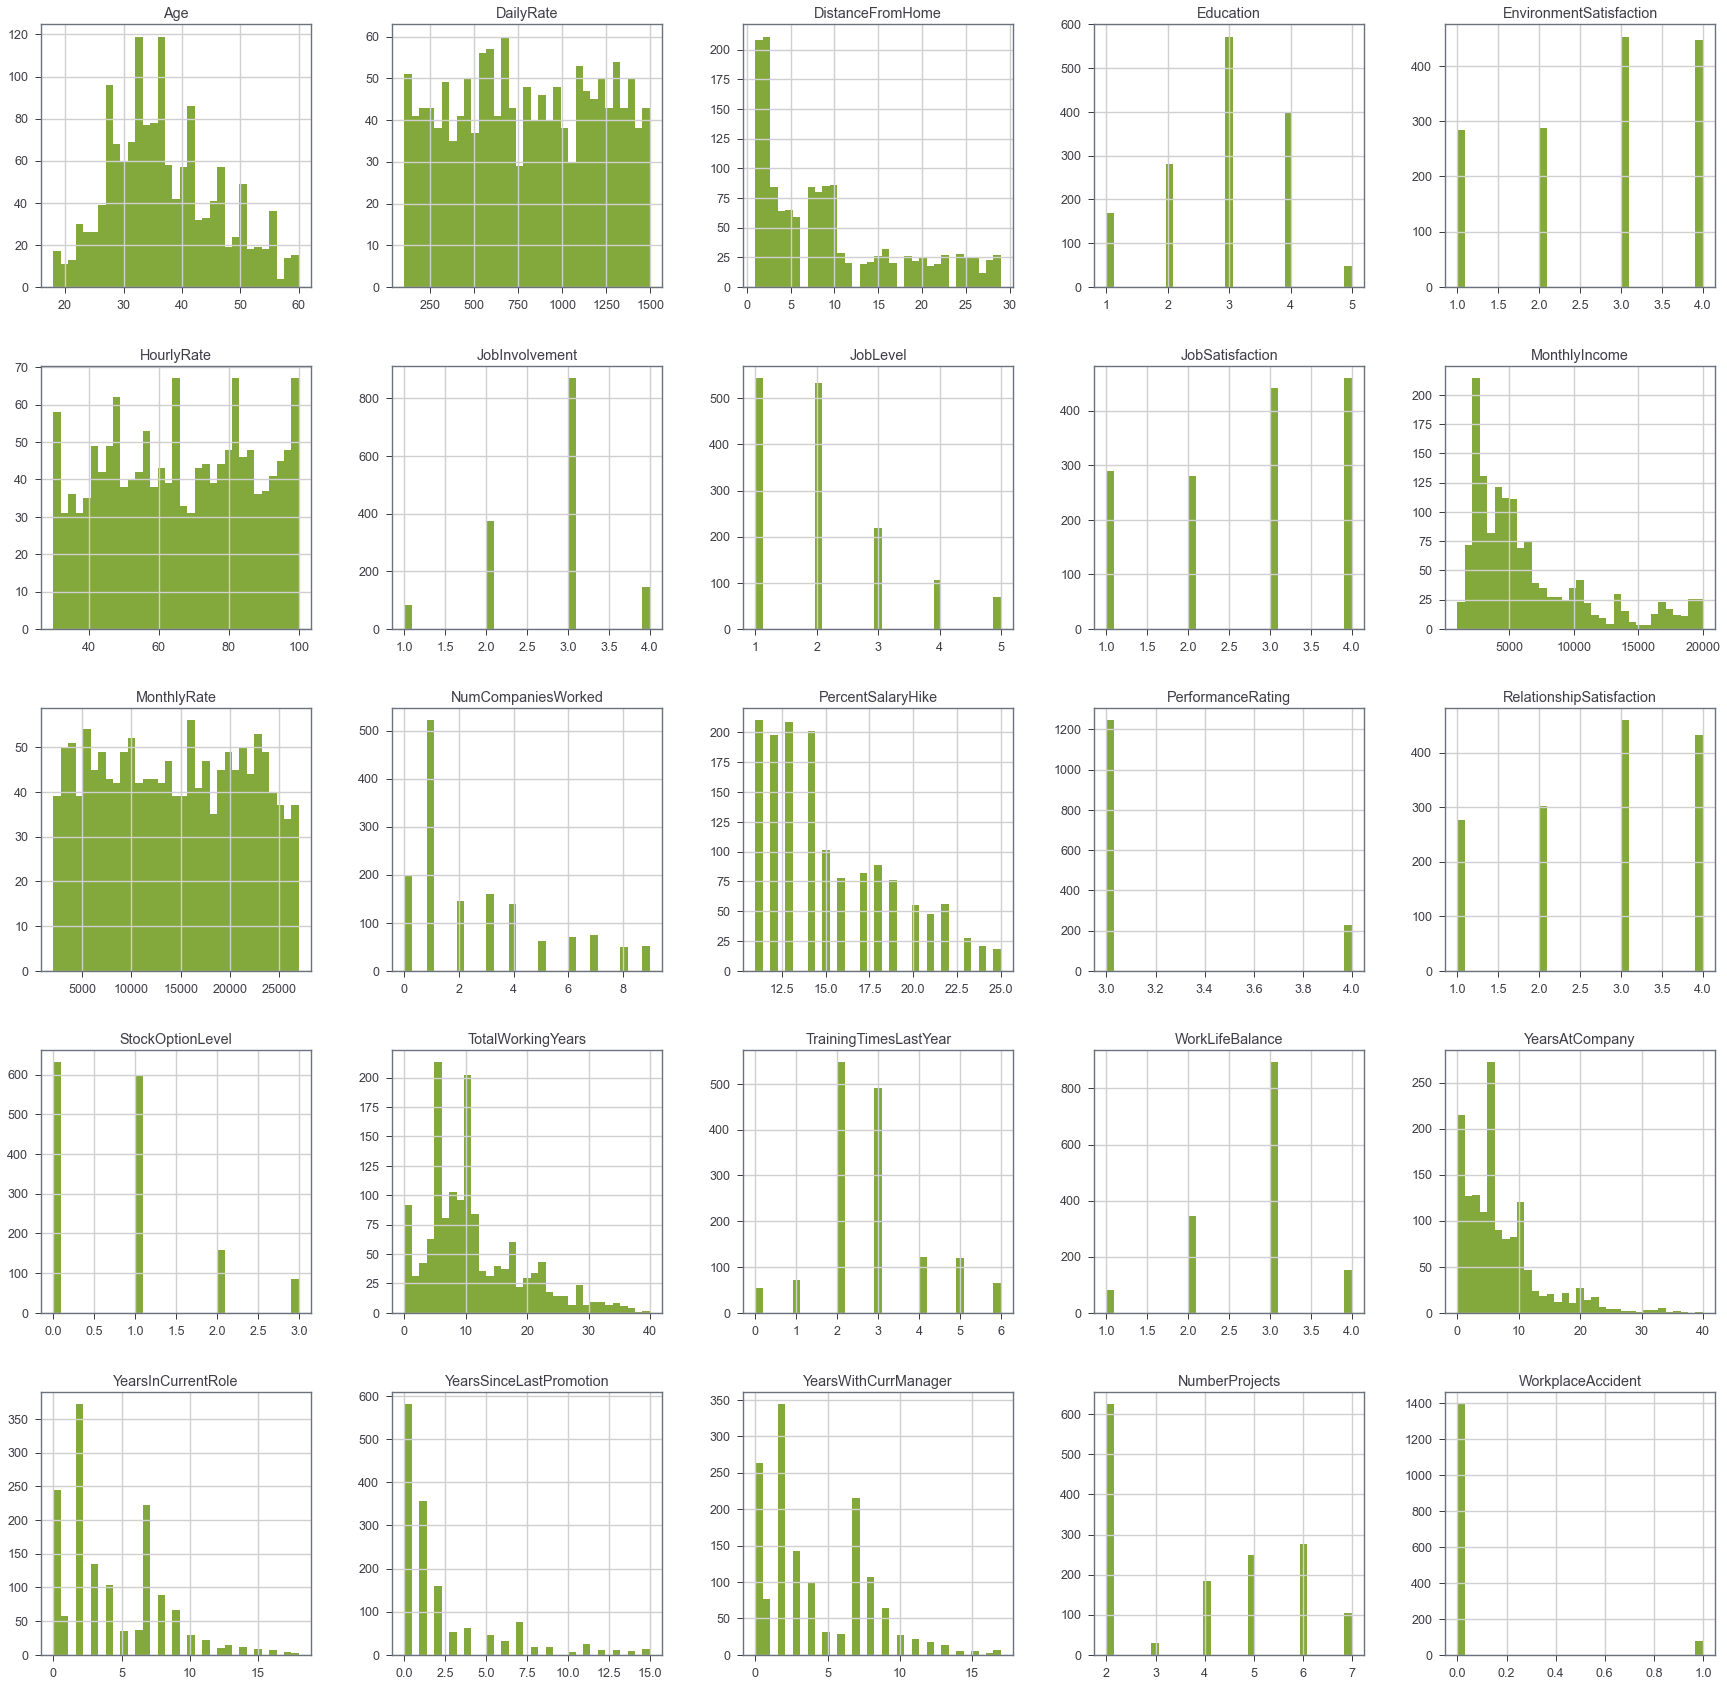

In [30]:
# Examine the distribution of the numerical features
hr_df.hist(bins = 33, figsize = (30,30), color = 'g');

In [31]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumberProjects',
       'WorkplaceAccident'],
      dtype='object')

In [32]:
plt.figure(figsize=[15,15])
plt.subplot(111)
sns.countplot(x = 'Department', hue = 'Attrition', data = hr_df)

<AxesSubplot:xlabel='Department', ylabel='count'>

<AxesSubplot:xlabel='NumberProjects', ylabel='count'>

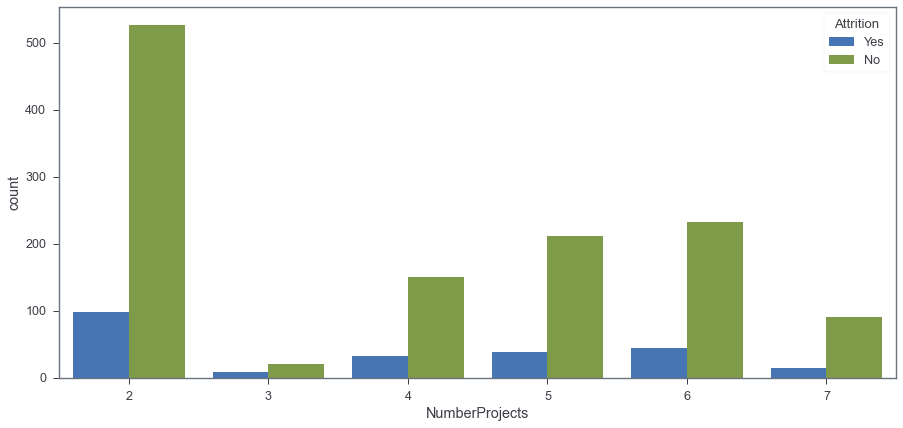

In [33]:
plt.figure(figsize=[15,15])
plt.subplot(211)
sns.countplot(x = 'NumberProjects', hue = 'Attrition', data = hr_df)

In [34]:
import seaborn as sns
# Examine correlations between features
correlation_matrix = hr_df.corr()
plt.figure(figsize=(35, 25))
heat_map = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' )

### Transform Phase
- One hot encoding
- Reduction/Scaling


In [35]:
# Before OneHotEncoder check the number of rows and columns
hr_df.shape

(1470, 33)

In [36]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
#generate categorical variable list
hr_cat = hr_df.dtypes[hr_df.dtypes == "object"].index.tolist()

# check unique values
print(hr_df[hr_cat].nunique())

enc = OneHotEncoder(sparse=False)

#fit/transform
hr_encode = pd.DataFrame(enc.fit_transform(hr_df[hr_cat]))

# add names to df
hr_encode.columns = enc.get_feature_names_out(hr_cat)

# look at it
hr_encode.head()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64


Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  \
0           0.0            1.0                        0.0   
1           1.0            0.0                        0.0   
2           0.0            1.0                        0.0   
3           1.0            0.0                        0.0   
4           1.0            0.0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                             0.0   
3               0.0                             0.0   
4               0.0                             0.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           1.0                       0.0   
2                           0.0                       0.0   
3                           1.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   1.0   
3                     0.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                              0.0            1.0          0.0   
1                              0.0            0.0          1.0   
2                              0.0            0.0          1.0   
3                              0.0            1.0          0.0   
4                              0.0            0.0          1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            1.0              0.0   
3                            0.0              0.0   
4                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                        

In [37]:
# merge/drop originals

hr_df = hr_df.merge(hr_encode, left_index=True, right_index=True)
hr_df = hr_df.drop(hr_cat, 1)

hr_df.head()

D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  NumberProjects  \
0                        0                     5               2   
1                        1                     7               5   
2                        0                     0               7   
3                        3                     0               5   
4                        2                     2               2   

   WorkplaceAccident  Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  \
0                  0           0.0            1.0                        0.0   
1                  0           1.0            0.0                        0.0   
2                  0           0.0            1.0                        0.0   
3                  0           1.0            0.0                        0.0   
4                  0           1.0            0.0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationFiel

In [38]:
hr_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumberProjects',
       'WorkplaceAccident', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 

In [39]:
# After OneHotEncoder check the number of rows and columns and the length, which should be 0
#   if all categorical columns are encoded
print(hr_df.shape)
print(len(hr_df.select_dtypes(include = "object").columns))

(1470, 55)
0


In [41]:
# split data into feature/target
y = hr_df['Attrition_Yes'].values
# X = hr_df.drop(['Attrition_Yes', 'Attrition_No'], 1)
X = hr_df.drop(columns=['Attrition_Yes', 'Attrition_No'])
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  NumberProjects  \
0                        0                     5               2   
1                        1                     7               5   
2                        0                     0               7   
3                        3                     0               5   
4                        2                     2               2   

   WorkplaceAccident  BusinessTravel_Non-Travel  \
0                  0                        0.0   
1                  0                        0.0   
2                  0                        0.0   
3                  0                        0.0   
4                  0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                        

In [42]:
print(y)

[1. 0. 1. ... 0. 0. 0.]


In [43]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=78)

In [44]:
print("X_train {}".format(X_train.shape))
print("X_test {}".format(X_test.shape))
print("y_train {}".format(y_train.shape))
print("y_test {}".format(y_test.shape))

X_train (1176, 53)
X_test (294, 53)
y_train (1176,)
y_test (294,)


In [45]:
# Reduction/Scaling
# scaling
from sklearn.preprocessing import StandardScaler ##?? MIN MAX SCALER?
# Create instance
scaler = StandardScaler()

# Fit 
X_scaler = scaler.fit(X_train)

# Scale 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
X_train_scaled

array([[ 3.57156995e-01, -1.32052987e-01,  3.77850497e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-8.64144324e-01,  4.76963816e-01, -8.79868677e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-7.53116932e-01,  1.08598062e+00,  5.34744547e-04, ...,
        -6.84225689e-01, -1.59107873e+00,  1.59107873e+00],
       ...,
       [-1.97979968e-01, -8.42986888e-01, -6.28324842e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-1.41928129e+00, -6.66496304e-01,  1.88711351e+00, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-6.42089539e-01, -1.16365288e+00,  5.34744547e-04, ...,
         1.46150607e+00, -1.59107873e+00,  1.59107873e+00]])

In [47]:
X_test_scaled

array([[ 1.35102210e-01,  1.71985525e+00,  1.26306662e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-8.64144324e-01, -9.00159894e-01, -1.25237173e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [ 5.79211781e-01,  1.66765381e+00, -5.02552925e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       ...,
       [ 2.46667746e+00,  1.57070828e+00,  2.01288542e+00, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01],
       [ 1.91154049e+00,  4.17305027e-01, -1.00564059e+00, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01],
       [-3.09007361e-01,  1.58810876e+00,  5.34744547e-04, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01]])


## Logistical Regression




### Build Model



In [48]:
# Import
from sklearn.linear_model import LogisticRegression

# create model
# By upping the max_iter parm to 10000 finally was able to get rid of warning, model performance also improved
LR_classifier = LogisticRegression(max_iter=10000, random_state=0)

# fit model
LR_classifier.fit(X_train, y_train)

# validate model
print(f"Training Data Score: {LR_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {LR_classifier.score(X_test, y_test)}")

# create predictions
LR_pred = LR_classifier.predict(X_test)


Training Data Score: 0.8877551020408163
Testing Data Score: 0.9081632653061225



### Assess classification model accuracy
- Calculate Accuracy Score 
- Calculate Confusion Matrix

In [53]:
# Import
from sklearn.metrics import accuracy_score

LR_acc_score = accuracy_score(y_test,LR_pred)
print("LR Accuracy Score = {0:.5g}%".format(LR_acc_score * 100))

LR Accuracy Score = 90.816%


In [54]:
# Import and create confusion matrix
from sklearn.metrics import confusion_matrix

LR_confusion_matrix = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix \n {}".format(LR_confusion_matrix))

LR Confusion Matrix 
 [[248   4]
 [ 23  19]]


In [55]:
# Alternate method to create confusion matrix
balanced_accuracy_score(y_test, LR_pred)

LR_CM = confusion_matrix(y_test, LR_pred)

LR_cm_df = pd.DataFrame(
    LR_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

LR_cm_df.head()


Predicted_high_risk  Predicted_low_risk
Actual_high_risk                  248                   4
Actual_low_risk                    23                  19

In [56]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, LR_pred))

# List the features sorted in descending order by feature importance - Not an option for Log regression
# features_rank_LR = sorted(zip(classifier.feature_importances_, X.columns), reverse=True)
# for feature in features_rank_LR:
#     print(f'{feature[1]}: ({feature[0]})')

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      0.98      0.45      0.95      0.67      0.47       252
        1.0       0.83      0.45      0.98      0.58      0.67      0.42        42

avg / total       0.90      0.91      0.53      0.90      0.67      0.46       294



<AxesSubplot:title={'center':'Feature Importance'}>

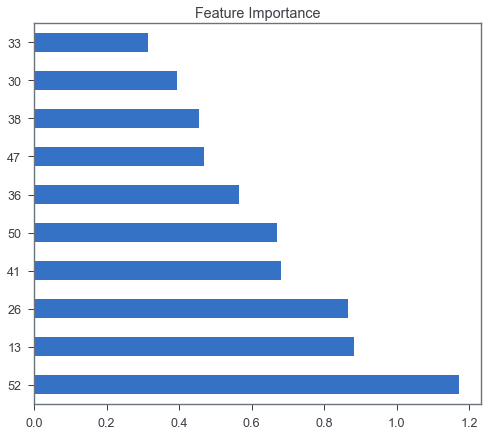

In [50]:
# Graph the Top 10 features in ascending order

importance = LR_classifier.coef_[0]
feat_importance = pd.Series(importance)
feat_importance.nlargest(10).plot(kind='barh',title = 'Feature Importance')

In [51]:
# What are the Top 10 features in importance for the model, ranked from most important to least

feature_names = X.columns
df_feature_names = pd.DataFrame({'features':feature_names})
print(df_feature_names.loc[feat_importance.nlargest(10).index, "features"])

52                        OverTime_Yes
13                   PerformanceRating
26    BusinessTravel_Travel_Frequently
41       JobRole_Laboratory Technician
50                MaritalStatus_Single
36     EducationField_Technical Degree
47        JobRole_Sales Representative
38                         Gender_Male
30                    Department_Sales
33            EducationField_Marketing
Name: features, dtype: object


In [ ]:
## Move Above to bottom


### Test Models
- Assess classification model accuracy
- Choose best performing model


In [101]:
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  NumberProjects  \
0                        0                     5               2   
1                        1                     7               5   
2                        0                     0               7   
3                        3                     0               5   
4                        2                     2               2   

   WorkplaceAccident  BusinessTravel_Non-Travel  \
0                  0                        0.0   
1                  0                        0.0   
2                  0                        0.0   
3                  0                        0.0   
4                  0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                        

In [102]:
from random import randint
rand_num = randint(0, len(X))

In [103]:
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]

In [104]:
single_observation

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1035   31       1398                 8          2                        4   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1035          96               4         1                2           2109   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
1035        24609                   9                 18                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1035                         4                 0                  8   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1035                      3                3               3   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1035                   2                        0                     2   

      NumberProjects  WorkplaceAccident  BusinessTravel_Non-Travel  \
1035               6                  0                        0.0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1035                               0.0                           1.0   

      Department_Human Resources  Department_Research & Development  \
1035                         1.0                                0.0   

      Department_Sales  EducationField_Human Resources  \
1035               0.0                             0.0   

      EducationField_Life Sciences  EducationField_Marketing  \
1035                           0.0                       0.0   

      EducationField_Medical  EducationField_Other  \
1035                     1.0                   0.0   

      EducationField_Technical Degree  Gender_Female  Gender_Male  \
1035                              0.0            1.0          0.0   

      JobRole_Healthcare Representative  JobRole_Human Resources  \
1035                                0.0                      1.0   

      JobRole_Laboratory Technician  JobRole_Manager  \
1035                            0.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
1035                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1035                         0.0                      0.0   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
1035                           0.0                     0.0   

      MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
1035                    0.0                   1.0          1.0           0.0

In [105]:
# Spot check the model by making a single prediction
print("This is a prediction using the LR classifier from a single observation at row {} {}".format(rand_num, LR_classifier.predict(scaler.transform(single_observation))))
print("The actual value in the dataframe at row is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the database is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))

This is a prediction using the LR classifier from a single observation at row 1035 [0.]
The actual value in the dataframe at row is 1035    0.0
Name: Attrition_Yes, dtype: float64 
The actual value in the database is 1035    No
Name: Attrition, dtype: object 


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"



## Random Forest



### Build Model



In [107]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit
rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)


### Assess classification model accuracy
- Calculate Accuracy Score 
- Calculate Confusion Matrix

In [108]:
rf_acc_score = accuracy_score(y_test,rf_pred)
print("RF Accuracy Score = {0:.5g}%".format(rf_acc_score * 100))

RF Accuracy Score = 87.075%


In [109]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("RF Confusion Matrix \n {}".format(rf_confusion_matrix))

RF Confusion Matrix 
 [[251   1]
 [ 37   5]]


In [110]:
balanced_accuracy_score(y_test, rf_pred)

RF_CM = confusion_matrix(y_test, rf_pred)

RF_cm_df = pd.DataFrame(
    RF_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

RF_cm_df.head()


Predicted_high_risk  Predicted_low_risk
Actual_high_risk                  251                   1
Actual_low_risk                    37                   5

In [146]:
# Calculated the balanced accuracy score
rf_pred = rf_classifier.predict(X_test)
balanced_accuracy_score(y_test, rf_pred)

# Display the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)


# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, rf_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.87      1.00      0.12      0.93      0.34      0.13       252
        1.0       0.83      0.12      1.00      0.21      0.34      0.11        42

avg / total       0.87      0.87      0.24      0.83      0.34      0.13       294



9          MonthlyIncome
0                    Age
19        YearsAtCompany
16     TotalWorkingYears
1              DailyRate
10           MonthlyRate
5             HourlyRate
2       DistanceFromHome
11    NumCompaniesWorked
12     PercentSalaryHike
Name: features, dtype: object


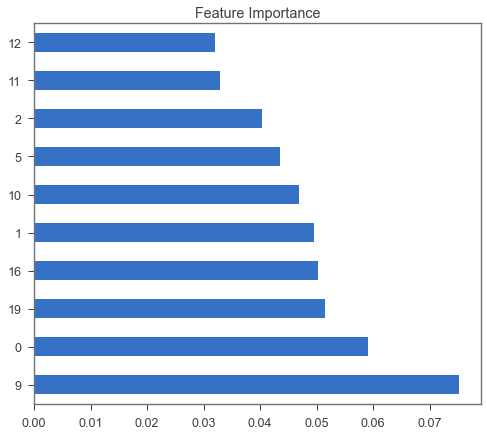

In [128]:
# Graph the Top 10 features in ascending order

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

feat_importance = pd.Series(importances)
feat_importance.nlargest(10).plot(kind='barh',title = 'Feature Importance')

df_feature_names = pd.DataFrame({'features':feature_names})
print(df_feature_names.loc[feat_importance.nlargest(10).index, "features"])



### Test Models
- Assess classification model accuracy


In [150]:
# Spot chexk the model by making a single prediction
rand_num = randint(0, len(X))
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]
# Spot xhexk the model by making a single prediction
print("Make a prediction using the RF classifier from a single observation at row {} {}".format(rand_num, rf_classifier.predict(scaler.transform(single_observation))))
print("The actual value in the dataframe at row is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the database is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))

Make a prediction using the RF classifier from a single observation at row 429 [1.]
The actual value in the dataframe at row is 429    0.0
Name: Attrition_Yes, dtype: float64 
The actual value in the database is 429    No
Name: Attrition, dtype: object 


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"



## Support Vector Machine



### Build Model



In [156]:
# Documentation = https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
from sklearn.svm import SVC

svc_classifier = SVC(kernel='rbf', C=2, random_state=44)
svc_classifier.fit(X_train, y_train)

SVC(C=2, random_state=44)

In [159]:
# Make the predictions
svc_pred = svc_classifier.predict(X_test)


### Assess classification model accuracy
- Calculate Accuracy Score 
- Calculate Confusion Matrix

In [160]:
acc_score = accuracy_score(y_test,svc_pred)
print("SVC Accuracy Score = {0:.5g}%".format(acc_score * 100))

SVC Accuracy Score = 85.714%


In [161]:
svc_confusion_matrix = confusion_matrix(y_test, svc_pred)
print("SVC Confusion Matrix \n {}".format(svc_confusion_matrix))

SVC Confusion Matrix 
 [[252   0]
 [ 42   0]]


In [182]:
balanced_accuracy_score(y_test, svc_pred)

SVC_CM = confusion_matrix(y_test, svc_pred)

SVC_cm_df = pd.DataFrame(
    SVC_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

SVC_cm_df.head()

Predicted_high_risk  Predicted_low_risk
Actual_high_risk                  252                   0
Actual_low_risk                    42                   0

In [183]:
# Calculated the balanced accuracy score
svc_pred = svc_classifier.predict(X_test)
balanced_accuracy_score(y_test, svc_pred)

# Display the confusion matrix
cm = confusion_matrix(y_test, svc_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)


# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, svc_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.86      1.00      0.00      0.92      0.00      0.00       252
        1.0       0.00      0.00      1.00      0.00      0.00      0.00        42

avg / total       0.73      0.86      0.14      0.79      0.00      0.00       294



D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Test Models
- Assess classification model accuracy


In [184]:
# Spot chexk the model by making a single prediction
rand_num = randint(0, len(X))
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]
# Spot check the model by making a single prediction
print("Make a prediction using the SVC classifier from a single observation at row {} {}".format(rand_num, svc_classifier.predict(scaler.transform(single_observation))))
print("The actual value in (Attrition_Yes) the original dataframe is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the dataframe is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))

Make a prediction using the SVC classifier from a single observation at row 584 [0.]
The actual value in (Attrition_Yes) the original dataframe is 584    0.0
Name: Attrition_Yes, dtype: float64 
The actual value in the dataframe is 584    No
Name: Attrition, dtype: object 


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"



## XGBoost



### Build Model



In [135]:
# Documentation = https://scikit-learn.org/stable/modules/classes.html
from sklearn.ensemble import GradientBoostingClassifier as XGB

xgb_classifier = XGB(random_state=44)
xgb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=44)

In [136]:
# Make the predictions
xgb_pred = xgb_classifier.predict(X_test)


### Assess classification model accuracy
- Calculate Accuracy Score 
- Calculate Confusion Matrix

In [140]:
xgb_acc_score = accuracy_score(y_test,xgb_pred)
print("XGBoost Accuracy Score = {0:.5g}%".format(xgb_acc_score * 100))

XGBoost Accuracy Score = 87.755%


In [138]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pred)
print("XGB Confusion Matrix \n {}".format(xgb_confusion_matrix))

XGB Confusion Matrix 
 [[247   5]
 [ 31  11]]


In [185]:
balanced_accuracy_score(y_test, xgb_pred)

XGB_CM = confusion_matrix(y_test, xgb_pred)

XGB_cm_df = pd.DataFrame(
    XGB_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

XGB_cm_df.head()

Predicted_high_risk  Predicted_low_risk
Actual_high_risk                  247                   5
Actual_low_risk                    31                  11


### Test Models
- Assess classification model accuracy
- Choose best performing model


In [ ]:
# Spot chexk the model by making a single prediction
rand_num = randint(0, len(X))
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]
# Spot xhexk the model by making a single prediction
print("Make a prediction using the LR classifier from a single observation at row {} {}".format(rand_num, xgb_classifier.predict(scaler.transform(single_observation))))
print("The actual value in (Attrition_Yes) the original dataframe is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the dataframe is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))


## Naive Bayes



### Build Model



In [141]:
# Documentation = https://scikit-learn.org/stable/modules/classes.html
from sklearn.naive_bayes import GaussianNB as GNB

In [142]:
gnb_classifier = GNB()
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [143]:
# Make the predictions
gnb_pred = gnb_classifier.predict(X_test)


### Assess classification model accuracy
- Calculate Accuracy Score 
- Calculate Confusion Matrix

In [144]:
naive_acc_score = accuracy_score(y_test,gnb_pred)
print("Naive Bayes Accuracy Score = {0:.5g}%".format(naive_acc_score * 100))

Naive Bayes Accuracy Score = 70.408%


In [189]:
gnb_confusion_matrix = confusion_matrix(y_test, gnb_pred)
print("XGB Confusion Matrix \n {}".format(gnb_confusion_matrix))

XGB Confusion Matrix 
 [[182  70]
 [ 17  25]]


In [188]:
balanced_accuracy_score(y_test, gnb_pred)

GNB_CM = confusion_matrix(y_test,gnb_pred)

gnb_cm_df = pd.DataFrame(
    GNB_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

gnb_cm_df.head()

Predicted_high_risk  Predicted_low_risk
Actual_high_risk                  182                  70
Actual_low_risk                    17                  25

In [191]:
# Spot chexk the model by making a single prediction
rand_num = randint(0, len(X))
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]
# Spot xhexk the model by making a single prediction
print("Make a prediction using the LR classifier from a single observation at row {} {}".format(rand_num, gnb_classifier.predict(scaler.transform(single_observation))))
print("The actual value for Attrition in the original dataframe is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the database is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))

Make a prediction using the LR classifier from a single observation at row 838 [1.]
The actual value in (Attrition_Yes) the original dataframe is 838    1.0
Name: Attrition_Yes, dtype: float64 
The actual value in the dataframe is 838    Yes
Name: Attrition, dtype: object 


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


## Which model is the most accurate
## We will take the most accurate model and perform hyperparameter tuning to see if we can increase model accuracy

In [190]:
print("LR Accuracy Score = {0:.5g}%".format(LR_acc_score * 100))
print("RF Accuracy Score = {0:.5g}%".format(rf_acc_score * 100))
print("XGBoost Accuracy Score = {0:.5g}%".format(xgb_acc_score * 100))
print("SVC Accuracy Score = {0:.5g}%".format(acc_score * 100))

LR Accuracy Score = 90.816%
RF Accuracy Score = 87.075%
XGBoost Accuracy Score = 87.755%
SVC Accuracy Score = 85.714%



### Hyper parameter tuning
- Grid search - This is the most comprehensive
Since logistic regression was the most accurate, we will attempt to increats it's accuracy using hyperparameter tuning

In [93]:
# Documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
# This takes several minutes to run

lr = LogisticRegression()             # initialize 

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']
max_iterations = [10000]

param_grid = dict(solver = solver_options, multi_class = 
multi_class_options, class_weight = class_weight_options, max_iter = max_iterations)

grid = GridSearchCV(lr, param_grid, cv=8, scoring = 'accuracy')
grid.fit(X, y)
grid.cv_results_

D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\env

D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\env

D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
56 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following erro

{'mean_fit_time': array([5.38942009e-01, 1.80221894e+00, 3.99777293e-03, 4.07280117e+00,
        6.48054570e+00, 2.00039148e-03, 2.12228298e-03, 1.75046921e-03,
        1.99890137e-03, 2.24834681e-03, 3.77907515e-01, 1.92140281e+00,
        4.46010828e-02, 4.94304943e+00, 7.41251385e+00, 1.09200093e+00,
        3.76347551e+00, 2.99814343e-03, 4.98564976e+00, 1.04863586e+01]),
 'std_fit_time': array([4.24019351e-02, 3.35757686e-01, 4.36987826e-07, 8.10603977e-02,
        9.14051324e-02, 4.22268516e-06, 3.27068061e-04, 4.33686000e-04,
        2.92001932e-07, 4.32947113e-04, 2.68993241e-02, 3.99355026e-01,
        6.49685044e-03, 2.34198431e-01, 3.52676441e-01, 1.24047806e-01,
        8.78190655e-01, 4.99725888e-04, 4.88878354e-02, 1.01925425e-01]),
 'mean_score_time': array([0.00224862, 0.00237355, 0.        , 0.00174764, 0.00187433,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00199863, 0.00249836, 0.00262415, 0.00187397, 0.00187555,
        0.00212374, 

In [94]:
grid_df = pd.DataFrame(grid.cv_results_)

In [95]:
grid.best_score_

0.8809656391066761

In [96]:
grid.best_params_

{'class_weight': 'None',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [97]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100, 200]},
              {'max_iter':[100000]}]

grid_diff_parms = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 8,           
                           verbose=3)

grid_diff_parms.fit(X, y)
grid_diff_parms.cv_results_

Fitting 8 folds for each of 17 candidates, totalling 136 fits


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 1/8] END ..................solver=newton-cg;, score=0.918 total time=   0.2s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 2/8] END ..................solver=newton-cg;, score=0.853 total time=   0.1s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 3/8] END ..................solver=newton-cg;, score=0.886 total time=   0.2s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 4/8] END ..................solver=newton-cg;, score=0.875 total time=   0.2s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 5/8] END ..................solver=newton-cg;, score=0.842 total time=   0.1s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 6/8] END ..................solver=newton-cg;, score=0.880 total time=   0.2s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


[CV 7/8] END ..................solver=newton-cg;, score=0.891 total time=   0.2s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

[CV 8/8] END ..................solver=newton-cg;, score=0.891 total time=   0.1s
[CV 1/8] END ......................solver=lbfgs;, score=0.837 total time=   0.0s
[CV 2/8] END ......................solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/8] END ......................solver=lbfgs;, score=0.837 total time=   0.0s
[CV 4/8] END ......................solver=lbfgs;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 5/8] END ......................solver=lbfgs;, score=0.837 total time=   0.0s
[CV 6/8] END ......................solver=lbfgs;, score=0.848 total time=   0.0s
[CV 7/8] END ......................solver=lbfgs;, score=0.836 total time=   0.0s
[CV 8/8] END ......................solver=lbfgs;, score=0.842 total time=   0.0s
[CV 1/8] END ..................solver=liblinear;, score=0.897 total time=   0.0s
[CV 2/8] END ..................solver=liblinear;, score=0.848 total time=   0.0s
[CV 3/8] END ..................solver=liblinear;, score=0.864 total time=   0.0s
[CV 4/8] END ..................solver=liblinear;, score=0.880 total time=   0.0s
[CV 5/8] END ..................solver=liblinear;, score=0.870 total time=   0.0s
[CV 6/8] END ..................solver=liblinear;, score=0.886 total time=   0.0s
[CV 7/8] END ..................solver=liblinear;, score=0.874 total time=   0.0s
[CV 8/8] END ..................solver=liblinear;, score=0.880 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/8] END ........................solver=sag;, score=0.837 total time=   0.0s
[CV 2/8] END ........................solver=sag;, score=0.837 total time=   0.0s
[CV 3/8] END ........................solver=sag;, score=0.837 total time=   0.0s
[CV 4/8] END ........................solver=sag;, score=0.837 total time=   0.0s
[CV 5/8] END ........................solver=sag;, score=0.837 total time=   0.0s
[CV 6/8] END ........................solver=sag;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 7/8] END ........................solver=sag;, score=0.842 total time=   0.0s
[CV 8/8] END ........................solver=sag;, score=0.842 total time=   0.0s
[CV 1/8] END .......................solver=saga;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/8] END .......................solver=saga;, score=0.837 total time=   0.0s
[CV 3/8] END .......................solver=saga;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/8] END .......................solver=saga;, score=0.837 total time=   0.0s
[CV 5/8] END .......................solver=saga;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 6/8] END .......................solver=saga;, score=0.842 total time=   0.0s
[CV 7/8] END .......................solver=saga;, score=0.842 total time=   0.0s
[CV 8/8] END .......................solver=saga;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\Prog

[CV 1/8] END ......................penalty=none;, score=0.837 total time=   0.0s
[CV 2/8] END ......................penalty=none;, score=0.837 total time=   0.0s
[CV 3/8] END ......................penalty=none;, score=0.848 total time=   0.0s
[CV 4/8] END ......................penalty=none;, score=0.837 total time=   0.0s
[CV 5/8] END ......................penalty=none;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 6/8] END ......................penalty=none;, score=0.848 total time=   0.0s
[CV 7/8] END ......................penalty=none;, score=0.858 total time=   0.0s
[CV 8/8] END ......................penalty=none;, score=0.842 total time=   0.0s
[CV 1/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 6/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 7/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 8/8] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/8] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/8] END ...............

D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 3/8] END ........................penalty=l2;, score=0.837 total time=   0.0s
[CV 4/8] END ........................penalty=l2;, score=0.837 total time=   0.0s
[CV 5/8] END ........................penalty=l2;, score=0.837 total time=   0.0s
[CV 6/8] END ........................penalty=l2;, score=0.848 total time=   0.0s
[CV 7/8] END ........................penalty=l2;, score=0.836 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 8/8] END ........................penalty=l2;, score=0.842 total time=   0.0s
[CV 1/8] END ...........................C=0.001;, score=0.837 total time=   0.0s
[CV 2/8] END ...........................C=0.001;, score=0.837 total time=   0.0s
[CV 3/8] END ...........................C=0.001;, score=0.837 total time=   0.0s
[CV 4/8] END ...........................C=0.001;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 5/8] END ...........................C=0.001;, score=0.837 total time=   0.0s
[CV 6/8] END ...........................C=0.001;, score=0.842 total time=   0.0s
[CV 7/8] END ...........................C=0.001;, score=0.842 total time=   0.0s
[CV 8/8] END ...........................C=0.001;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 1/8] END ............................C=0.01;, score=0.848 total time=   0.0s
[CV 2/8] END ............................C=0.01;, score=0.832 total time=   0.0s
[CV 3/8] END ............................C=0.01;, score=0.837 total time=   0.0s
[CV 4/8] END ............................C=0.01;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 5/8] END ............................C=0.01;, score=0.842 total time=   0.0s
[CV 6/8] END ............................C=0.01;, score=0.848 total time=   0.0s
[CV 7/8] END ............................C=0.01;, score=0.847 total time=   0.0s
[CV 8/8] END ............................C=0.01;, score=0.842 total time=   0.0s
[CV 1/8] END .............................C=0.1;, score=0.832 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 2/8] END .............................C=0.1;, score=0.837 total time=   0.0s
[CV 3/8] END .............................C=0.1;, score=0.842 total time=   0.0s
[CV 4/8] END .............................C=0.1;, score=0.837 total time=   0.0s
[CV 5/8] END .............................C=0.1;, score=0.842 total time=   0.0s
[CV 6/8] END .............................C=0.1;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 7/8] END .............................C=0.1;, score=0.836 total time=   0.0s
[CV 8/8] END .............................C=0.1;, score=0.842 total time=   0.0s
[CV 1/8] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 2/8] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 3/8] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 4/8] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 5/8] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 6/8] END ...............................C=1;, score=0.848 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 7/8] END ...............................C=1;, score=0.836 total time=   0.0s
[CV 8/8] END ...............................C=1;, score=0.842 total time=   0.0s
[CV 1/8] END ..............................C=10;, score=0.842 total time=   0.0s
[CV 2/8] END ..............................C=10;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 3/8] END ..............................C=10;, score=0.842 total time=   0.0s
[CV 4/8] END ..............................C=10;, score=0.837 total time=   0.0s
[CV 5/8] END ..............................C=10;, score=0.842 total time=   0.0s
[CV 6/8] END ..............................C=10;, score=0.848 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 7/8] END ..............................C=10;, score=0.847 total time=   0.0s
[CV 8/8] END ..............................C=10;, score=0.836 total time=   0.0s
[CV 1/8] END .............................C=100;, score=0.842 total time=   0.0s
[CV 2/8] END .............................C=100;, score=0.837 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 3/8] END .............................C=100;, score=0.842 total time=   0.0s
[CV 4/8] END .............................C=100;, score=0.837 total time=   0.0s
[CV 5/8] END .............................C=100;, score=0.832 total time=   0.0s
[CV 6/8] END .............................C=100;, score=0.842 total time=   0.0s
[CV 7/8] END .............................C=100;, score=0.836 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 8/8] END .............................C=100;, score=0.842 total time=   0.0s
[CV 1/8] END .............................C=200;, score=0.842 total time=   0.0s
[CV 2/8] END .............................C=200;, score=0.837 total time=   0.0s
[CV 3/8] END .............................C=200;, score=0.848 total time=   0.0s
[CV 4/8] END .............................C=200;, score=0.837 total time=   0.0s
[CV 5/8] END .............................C=200;, score=0.837 total time=   0.0s
[CV 6/8] END .............................C=200;, score=0.842 total time=   0.0s
[CV 7/8] END .............................C=200;, score=0.842 total time=   0.0s
[CV 8/8] END .............................C=200;, score=0.842 total time=   0.0s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[CV 1/8] END ...................max_iter=100000;, score=0.913 total time=   2.1s
[CV 2/8] END ...................max_iter=100000;, score=0.848 total time=   1.4s
[CV 3/8] END ...................max_iter=100000;, score=0.870 total time=   1.6s
[CV 4/8] END ...................max_iter=100000;, score=0.880 total time=   1.1s
[CV 5/8] END ...................max_iter=100000;, score=0.859 total time=   1.8s
[CV 6/8] END ...................max_iter=100000;, score=0.880 total time=   1.7s
[CV 7/8] END ...................max_iter=100000;, score=0.902 total time=   1.7s
[CV 8/8] END ...................max_iter=100000;, score=0.891 total time=   2.1s


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
16 fits failed out of a total of 136.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\ProgramData\Anaconda3\envs\Machin

{'mean_fit_time': array([2.47483343e-01, 4.24759686e-02, 2.67346501e-02, 6.57178760e-02,
        1.02692574e-01, 4.17261422e-02, 7.49677420e-04, 7.49558210e-04,
        4.07269895e-02, 4.14763093e-02, 4.49746847e-02, 4.02269959e-02,
        4.50993180e-02, 4.77225184e-02, 4.07263935e-02, 3.98560762e-02,
        1.78098238e+00]),
 'std_fit_time': array([0.01985012, 0.00661069, 0.00810023, 0.00737106, 0.01142636,
        0.00544497, 0.00043283, 0.00043276, 0.00776916, 0.00720715,
        0.0074458 , 0.00566998, 0.00445404, 0.00702694, 0.00691981,
        0.00650137, 0.30825352]),
 'mean_score_time': array([0.00249967, 0.00262323, 0.00212404, 0.00199944, 0.0023739 ,
        0.00224674, 0.        , 0.        , 0.00212348, 0.00224862,
        0.00237346, 0.00249887, 0.00299817, 0.00287312, 0.00287333,
        0.00287202, 0.00237378]),
 'std_score_time': array([0.00050095, 0.00048385, 0.00092662, 0.00050002, 0.00085654,
        0.00042942, 0.        , 0.        , 0.00033094, 0.00066086,
    

In [98]:
grid_diff_parms_df = pd.DataFrame(grid_diff_parms.cv_results_)

In [99]:
grid_diff_parms.best_score_

0.8802937158469946

In [100]:
grid_diff_parms.best_params_

{'max_iter': 100000}


## Test Models
- Assess classification model accuracy
- Choose best performing model


In [195]:
# Spot chexk the model by making a single prediction
rand_num = randint(0, len(X))
# Check the model by making a prediction from an observation
single_observation = X.iloc[[rand_num]]
# Spot xhexk the model by making a single prediction
print("Make a prediction using the LR classifier from a single observation at row {} {}".format(rand_num, LR_classifier.predict(scaler.transform(single_observation))))
print("The actual value in Attrition the original dataframe is {} ".format(hr_df.iloc[[rand_num]]["Attrition_Yes"]))
print("The actual value in the dataframe is {} ".format(hr_df_copy.iloc[[rand_num]]["Attrition"]))

Make a prediction using the LR classifier from a single observation at row 926 [0.]
The actual value in Attrition the original dataframe is 926    0.0
Name: Attrition_Yes, dtype: float64 
The actual value in the dataframe is 926    No
Name: Attrition, dtype: object 


D:\ProgramData\Anaconda3\envs\MachineLearningEnvironment\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"



### Finalize Model